# **Dependencies**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Custom_Python_Scripts')

In [ ]:
%load '/content/drive/My Drive/Custom_Python_Scripts/bl_ml_toolkit.py'

In [ ]:
from bl_ml_toolkit import ImputMissingValues, DummyTransformer, FestureImpoertanceVariableSelection, RegularizationFeatureSelection, VariableClusteringSelection, OptimalNominalBinning, OptimalIntervalBinning

# **Data Prep**

In [ ]:
feature_names = {
    1: 'Age',
    2: 'Sex',
    3: 'Height',
    4: 'Weight',
    5: 'QRS duration',
    6: 'P-R interval',
    7: 'Q-T interval',
    8: 'T interval',
    9: 'P interval',
    10: 'QRS',
    11: 'T',
    12: 'P',
    13: 'QRST',
    14: 'J',
    15: 'Heart rate'
}

In [ ]:
avg_width_options = ['Q wave', 'R wave', 'S wave', 'R\'', 
 'S\' wave', 'Number of intrinsic deflections',  'Existence of ragged R wave',
 'Existence of diphasic derivation of R wave', 'Existence of ragged P wave',
 'Existence of diphasic derivation of P wave', 'Existence of ragged T wave',
 'Existence of diphasic derivation of T wave']

amplitute_options = ['JJ wave', 'Q wave', 'R wave', 'S wave', 'R\'', 
 'S\' wave', 'P wave', 'T wave', 'QRSA', 'QRSTA']

channels = ['channel DI', 'channel DII', 'channels DIII', 'channel AVR', 
            'channel AVL', 'channel AVF', 'channel V1', 'channel V2', 
            'channel V3', 'channel V4', 'channel V5', 'channel V6']
for c in channels:
  feature_names.update({(ix + 1 + len(feature_names)) : c + ' - avg width of - ' + f for ix, f in enumerate(avg_width_options)})

for c in channels:
  feature_names.update({(ix + 1 + len(feature_names)) : c + ' - amplitude of - ' + f for ix, f in enumerate(amplitute_options)})

feature_names.update({len(feature_names) + 1 : 'target - arrhythmia'})

In [ ]:
feature_names

{1: 'Age',
 2: 'Sex',
 3: 'Height',
 4: 'Weight',
 5: 'QRS duration',
 6: 'P-R interval',
 7: 'Q-T interval',
 8: 'T interval',
 9: 'P interval',
 10: 'QRS',
 11: 'T',
 12: 'P',
 13: 'QRST',
 14: 'J',
 15: 'Heart rate',
 16: 'channel DI - avg width of - Q wave',
 17: 'channel DI - avg width of - R wave',
 18: 'channel DI - avg width of - S wave',
 19: "channel DI - avg width of - R'",
 20: "channel DI - avg width of - S' wave",
 21: 'channel DI - avg width of - Number of intrinsic deflections',
 22: 'channel DI - avg width of - Existence of ragged R wave',
 23: 'channel DI - avg width of - Existence of diphasic derivation of R wave',
 24: 'channel DI - avg width of - Existence of ragged P wave',
 25: 'channel DI - avg width of - Existence of diphasic derivation of P wave',
 26: 'channel DI - avg width of - Existence of ragged T wave',
 27: 'channel DI - avg width of - Existence of diphasic derivation of T wave',
 28: 'channel DII - avg width of - Q wave',
 29: 'channel DII - avg width 

In [ ]:
column_names = [feature_names[key] for key in sorted(feature_names)]
column_dtypes = {feature_names[key] : 'float64' if feature_names[key] != 'Sex' and 'Existence' not in feature_names[key] and 'target' not in feature_names[key] else 'category' for key in sorted(feature_names)}

In [ ]:
column_dtypes

{'Age': 'float64',
 'Heart rate': 'float64',
 'Height': 'float64',
 'J': 'float64',
 'P': 'float64',
 'P interval': 'float64',
 'P-R interval': 'float64',
 'Q-T interval': 'float64',
 'QRS': 'float64',
 'QRS duration': 'float64',
 'QRST': 'float64',
 'Sex': 'category',
 'T': 'float64',
 'T interval': 'float64',
 'Weight': 'float64',
 'channel AVF - amplitude of - JJ wave': 'float64',
 'channel AVF - amplitude of - P wave': 'float64',
 'channel AVF - amplitude of - Q wave': 'float64',
 'channel AVF - amplitude of - QRSA': 'float64',
 'channel AVF - amplitude of - QRSTA': 'float64',
 'channel AVF - amplitude of - R wave': 'float64',
 "channel AVF - amplitude of - R'": 'float64',
 'channel AVF - amplitude of - S wave': 'float64',
 "channel AVF - amplitude of - S' wave": 'float64',
 'channel AVF - amplitude of - T wave': 'float64',
 'channel AVF - avg width of - Existence of diphasic derivation of P wave': 'category',
 'channel AVF - avg width of - Existence of diphasic derivation of R wav

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Arrhythmia/arrhythmia.data', names=column_names)

In [ ]:
data.shape

(452, 280)

In [ ]:
data

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate,channel DI - avg width of - Q wave,channel DI - avg width of - R wave,channel DI - avg width of - S wave,channel DI - avg width of - R',channel DI - avg width of - S' wave,channel DI - avg width of - Number of intrinsic deflections,channel DI - avg width of - Existence of ragged R wave,channel DI - avg width of - Existence of diphasic derivation of R wave,channel DI - avg width of - Existence of ragged P wave,channel DI - avg width of - Existence of diphasic derivation of P wave,channel DI - avg width of - Existence of ragged T wave,channel DI - avg width of - Existence of diphasic derivation of T wave,channel DII - avg width of - Q wave,channel DII - avg width of - R wave,channel DII - avg width of - S wave,channel DII - avg width of - R',channel DII - avg width of - S' wave,channel DII - avg width of - Number of intrinsic deflections,channel DII - avg width of - Existence of ragged R wave,channel DII - avg width of - Existence of diphasic derivation of R wave,channel DII - avg width of - Existence of ragged P wave,channel DII - avg width of - Existence of diphasic derivation of P wave,channel DII - avg width of - Existence of ragged T wave,channel DII - avg width of - Existence of diphasic derivation of T wave,channels DIII - avg width of - Q wave,...,channel V3 - amplitude of - Q wave,channel V3 - amplitude of - R wave,channel V3 - amplitude of - S wave,channel V3 - amplitude of - R',channel V3 - amplitude of - S' wave,channel V3 - amplitude of - P wave,channel V3 - amplitude of - T wave,channel V3 - amplitude of - QRSA,channel V3 - amplitude of - QRSTA,channel V4 - amplitude of - JJ wave,channel V4 - amplitude of - Q wave,channel V4 - amplitude of - R wave,channel V4 - amplitude of - S wave,channel V4 - amplitude of - R',channel V4 - amplitude of - S' wave,channel V4 - amplitude of - P wave,channel V4 - amplitude of - T wave,channel V4 - amplitude of - QRSA,channel V4 - amplitude of - QRSTA,channel V5 - amplitude of - JJ wave,channel V5 - amplitude of - Q wave,channel V5 - amplitude of - R wave,channel V5 - amplitude of - S wave,channel V5 - amplitude of - R',channel V5 - amplitude of - S' wave,channel V5 - amplitude of - P wave,channel V5 - amplitude of - T wave,channel V5 - amplitude of - QRSA,channel V5 - amplitude of - QRSTA,channel V6 - amplitude of - JJ wave,channel V6 - amplitude of - Q wave,channel V6 - amplitude of - R wave,channel V6 - amplitude of - S wave,channel V6 - amplitude of - R',channel V6 - amplitude of - S' wave,channel V6 - amplitude of - P wave,channel V6 - amplitude of - T wave,channel V6 - amplitude of - QRSA,channel V6 - amplitude of - QRSTA,target - arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.00,8.40,-10.00,0.00,0.00,0.60,5.90,-3.90,52.70,-0.30,0.00,15.20,-8.40,0.00,0.00,0.90,5.10,17.70,70.70,-0.40,0.00,13.50,-4.00,0.00,0.00,0.90,3.90,25.50,62.90,-0.30,0.00,9.00,-0.90,0.00,0.00,0.90,2.90,23.30,49.40,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.00,5.80,-7.70,0.00,0.00,0.90,3.80,-5.70,27.70,-0.20,0.00,9.50,-5.00,0.00,0.00,0.50,2.60,11.80,34.60,-0.40,0.00,11.00,-2.40,0.00,0.00,0.40,2.60,21.60,43.40,-0.50,0.00,8.50,0.00,0.00,0.00,0.20,2.10,20.40,38.80,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.00,5.80,-4.10,4.00,-0.50,0.40,0.30,20.40,23.30,0.70,0.00,10.00,-5.70,0.00,0.00,0.50,2.20,-3.00,20.70,1.30,0.00,11.10,-3.40,0.00,0.00,0.40,3.40,11.50,48.20,0.90,0.00,9.50,-2.40,0.00,0.00,0.30,3.40,12.30,49.00,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.00,9.00,-7.90,0.00,0.00,0.10,4.10,7.60,51.00,0.40,0.00,15.00,-5.50,0.00,0.00,0.10,3.30,28.80,63.10,0.10,0.00,15.20,-3.70,0.00,0.00,0.60,3.00,36.80,68.00,0.10,0.00

In [ ]:
data = data.replace('?', np.nan)

In [ ]:
data

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate,channel DI - avg width of - Q wave,channel DI - avg width of - R wave,channel DI - avg width of - S wave,channel DI - avg width of - R',channel DI - avg width of - S' wave,channel DI - avg width of - Number of intrinsic deflections,channel DI - avg width of - Existence of ragged R wave,channel DI - avg width of - Existence of diphasic derivation of R wave,channel DI - avg width of - Existence of ragged P wave,channel DI - avg width of - Existence of diphasic derivation of P wave,channel DI - avg width of - Existence of ragged T wave,channel DI - avg width of - Existence of diphasic derivation of T wave,channel DII - avg width of - Q wave,channel DII - avg width of - R wave,channel DII - avg width of - S wave,channel DII - avg width of - R',channel DII - avg width of - S' wave,channel DII - avg width of - Number of intrinsic deflections,channel DII - avg width of - Existence of ragged R wave,channel DII - avg width of - Existence of diphasic derivation of R wave,channel DII - avg width of - Existence of ragged P wave,channel DII - avg width of - Existence of diphasic derivation of P wave,channel DII - avg width of - Existence of ragged T wave,channel DII - avg width of - Existence of diphasic derivation of T wave,channels DIII - avg width of - Q wave,...,channel V3 - amplitude of - Q wave,channel V3 - amplitude of - R wave,channel V3 - amplitude of - S wave,channel V3 - amplitude of - R',channel V3 - amplitude of - S' wave,channel V3 - amplitude of - P wave,channel V3 - amplitude of - T wave,channel V3 - amplitude of - QRSA,channel V3 - amplitude of - QRSTA,channel V4 - amplitude of - JJ wave,channel V4 - amplitude of - Q wave,channel V4 - amplitude of - R wave,channel V4 - amplitude of - S wave,channel V4 - amplitude of - R',channel V4 - amplitude of - S' wave,channel V4 - amplitude of - P wave,channel V4 - amplitude of - T wave,channel V4 - amplitude of - QRSA,channel V4 - amplitude of - QRSTA,channel V5 - amplitude of - JJ wave,channel V5 - amplitude of - Q wave,channel V5 - amplitude of - R wave,channel V5 - amplitude of - S wave,channel V5 - amplitude of - R',channel V5 - amplitude of - S' wave,channel V5 - amplitude of - P wave,channel V5 - amplitude of - T wave,channel V5 - amplitude of - QRSA,channel V5 - amplitude of - QRSTA,channel V6 - amplitude of - JJ wave,channel V6 - amplitude of - Q wave,channel V6 - amplitude of - R wave,channel V6 - amplitude of - S wave,channel V6 - amplitude of - R',channel V6 - amplitude of - S' wave,channel V6 - amplitude of - P wave,channel V6 - amplitude of - T wave,channel V6 - amplitude of - QRSA,channel V6 - amplitude of - QRSTA,target - arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,NaN,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.00,8.40,-10.00,0.00,0.00,0.60,5.90,-3.90,52.70,-0.30,0.00,15.20,-8.40,0.00,0.00,0.90,5.10,17.70,70.70,-0.40,0.00,13.50,-4.00,0.00,0.00,0.90,3.90,25.50,62.90,-0.30,0.00,9.00,-0.90,0.00,0.00,0.90,2.90,23.30,49.40,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,NaN,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.00,5.80,-7.70,0.00,0.00,0.90,3.80,-5.70,27.70,-0.20,0.00,9.50,-5.00,0.00,0.00,0.50,2.60,11.80,34.60,-0.40,0.00,11.00,-2.40,0.00,0.00,0.40,2.60,21.60,43.40,-0.50,0.00,8.50,0.00,0.00,0.00,0.20,2.10,20.40,38.80,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.00,5.80,-4.10,4.00,-0.50,0.40,0.30,20.40,23.30,0.70,0.00,10.00,-5.70,0.00,0.00,0.50,2.20,-3.00,20.70,1.30,0.00,11.10,-3.40,0.00,0.00,0.40,3.40,11.50,48.20,0.90,0.00,9.50,-2.40,0.00,0.00,0.30,3.40,12.30,49.00,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,NaN,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.00,9.00,-7.90,0.00,0.00,0.10,4.10,7.60,51.00,0.40,0.00,15.00,-5.50,0.00,0.00,0.10,3.30,28.80,63.10,0.10,0.00,15.20,-3.70,0.00,0.00,0.60,3.00,36.80,68.00,0.1

In [ ]:
for c, dtype in column_dtypes.items():
  #print(c, dtype)
  data[c] = data[c].astype(dtype)

In [ ]:
data

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate,channel DI - avg width of - Q wave,channel DI - avg width of - R wave,channel DI - avg width of - S wave,channel DI - avg width of - R',channel DI - avg width of - S' wave,channel DI - avg width of - Number of intrinsic deflections,channel DI - avg width of - Existence of ragged R wave,channel DI - avg width of - Existence of diphasic derivation of R wave,channel DI - avg width of - Existence of ragged P wave,channel DI - avg width of - Existence of diphasic derivation of P wave,channel DI - avg width of - Existence of ragged T wave,channel DI - avg width of - Existence of diphasic derivation of T wave,channel DII - avg width of - Q wave,channel DII - avg width of - R wave,channel DII - avg width of - S wave,channel DII - avg width of - R',channel DII - avg width of - S' wave,channel DII - avg width of - Number of intrinsic deflections,channel DII - avg width of - Existence of ragged R wave,channel DII - avg width of - Existence of diphasic derivation of R wave,channel DII - avg width of - Existence of ragged P wave,channel DII - avg width of - Existence of diphasic derivation of P wave,channel DII - avg width of - Existence of ragged T wave,channel DII - avg width of - Existence of diphasic derivation of T wave,channels DIII - avg width of - Q wave,...,channel V3 - amplitude of - Q wave,channel V3 - amplitude of - R wave,channel V3 - amplitude of - S wave,channel V3 - amplitude of - R',channel V3 - amplitude of - S' wave,channel V3 - amplitude of - P wave,channel V3 - amplitude of - T wave,channel V3 - amplitude of - QRSA,channel V3 - amplitude of - QRSTA,channel V4 - amplitude of - JJ wave,channel V4 - amplitude of - Q wave,channel V4 - amplitude of - R wave,channel V4 - amplitude of - S wave,channel V4 - amplitude of - R',channel V4 - amplitude of - S' wave,channel V4 - amplitude of - P wave,channel V4 - amplitude of - T wave,channel V4 - amplitude of - QRSA,channel V4 - amplitude of - QRSTA,channel V5 - amplitude of - JJ wave,channel V5 - amplitude of - Q wave,channel V5 - amplitude of - R wave,channel V5 - amplitude of - S wave,channel V5 - amplitude of - R',channel V5 - amplitude of - S' wave,channel V5 - amplitude of - P wave,channel V5 - amplitude of - T wave,channel V5 - amplitude of - QRSA,channel V5 - amplitude of - QRSTA,channel V6 - amplitude of - JJ wave,channel V6 - amplitude of - Q wave,channel V6 - amplitude of - R wave,channel V6 - amplitude of - S wave,channel V6 - amplitude of - R',channel V6 - amplitude of - S' wave,channel V6 - amplitude of - P wave,channel V6 - amplitude of - T wave,channel V6 - amplitude of - QRSA,channel V6 - amplitude of - QRSTA,target - arrhythmia
0,75.00,0,190.00,80.00,91.00,193.00,371.00,174.00,121.00,-16.00,13.00,64.00,-2.00,nan,63.00,0.00,52.00,44.00,0.00,0.00,32.00,0,0,0,0,0,0,0.00,44.00,20.00,36.00,0.00,28.00,0,0,0,0,0,0,52.00,...,0.00,8.40,-10.00,0.00,0.00,0.60,5.90,-3.90,52.70,-0.30,0.00,15.20,-8.40,0.00,0.00,0.90,5.10,17.70,70.70,-0.40,0.00,13.50,-4.00,0.00,0.00,0.90,3.90,25.50,62.90,-0.30,0.00,9.00,-0.90,0.00,0.00,0.90,2.90,23.30,49.40,8
1,56.00,1,165.00,64.00,81.00,174.00,401.00,149.00,39.00,25.00,37.00,-17.00,31.00,nan,53.00,0.00,48.00,0.00,0.00,0.00,24.00,0,0,0,0,0,0,0.00,64.00,0.00,0.00,0.00,24.00,0,0,0,0,0,0,32.00,...,0.00,5.80,-7.70,0.00,0.00,0.90,3.80,-5.70,27.70,-0.20,0.00,9.50,-5.00,0.00,0.00,0.50,2.60,11.80,34.60,-0.40,0.00,11.00,-2.40,0.00,0.00,0.40,2.60,21.60,43.40,-0.50,0.00,8.50,0.00,0.00,0.00,0.20,2.10,20.40,38.80,6
2,54.00,0,172.00,95.00,138.00,163.00,386.00,185.00,102.00,96.00,34.00,70.00,66.00,23.00,75.00,0.00,40.00,80.00,0.00,0.00,24.00,0,0,0,0,0,0,20.00,56.00,52.00,0.00,0.00,40.00,0,0,0,0,0,0,28.00,...,0.00,5.80,-4.10,4.00,-0.50,0.40,0.30,20.40,23.30,0.70,0.00,10.00,-5.70,0.00,0.00,0.50,2.20,-3.00,20.70,1.30,0.00,11.10,-3.40,0.00,0.00,0.40,3.40,11.50,48.20,0.90,0.00,9.50,-2.40,0.00,0.00,0.30,3.40,12.30,49.00,10
3,55.00,0,175.00,94.00,100.00,202.0

In [ ]:
data['target - arrhythmia'] = data['target - arrhythmia'].apply(lambda x: 0 if x == 1 else 1).astype('float64')

In [ ]:
X_data = data.iloc[:, :-1]

In [ ]:
Y_data = data.iloc[:, -1:]

# **Data Partition**

In [ ]:
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=54321)

In [ ]:
X_data_train

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate,channel DI - avg width of - Q wave,channel DI - avg width of - R wave,channel DI - avg width of - S wave,channel DI - avg width of - R',channel DI - avg width of - S' wave,channel DI - avg width of - Number of intrinsic deflections,channel DI - avg width of - Existence of ragged R wave,channel DI - avg width of - Existence of diphasic derivation of R wave,channel DI - avg width of - Existence of ragged P wave,channel DI - avg width of - Existence of diphasic derivation of P wave,channel DI - avg width of - Existence of ragged T wave,channel DI - avg width of - Existence of diphasic derivation of T wave,channel DII - avg width of - Q wave,channel DII - avg width of - R wave,channel DII - avg width of - S wave,channel DII - avg width of - R',channel DII - avg width of - S' wave,channel DII - avg width of - Number of intrinsic deflections,channel DII - avg width of - Existence of ragged R wave,channel DII - avg width of - Existence of diphasic derivation of R wave,channel DII - avg width of - Existence of ragged P wave,channel DII - avg width of - Existence of diphasic derivation of P wave,channel DII - avg width of - Existence of ragged T wave,channel DII - avg width of - Existence of diphasic derivation of T wave,channels DIII - avg width of - Q wave,...,channel V3 - amplitude of - JJ wave,channel V3 - amplitude of - Q wave,channel V3 - amplitude of - R wave,channel V3 - amplitude of - S wave,channel V3 - amplitude of - R',channel V3 - amplitude of - S' wave,channel V3 - amplitude of - P wave,channel V3 - amplitude of - T wave,channel V3 - amplitude of - QRSA,channel V3 - amplitude of - QRSTA,channel V4 - amplitude of - JJ wave,channel V4 - amplitude of - Q wave,channel V4 - amplitude of - R wave,channel V4 - amplitude of - S wave,channel V4 - amplitude of - R',channel V4 - amplitude of - S' wave,channel V4 - amplitude of - P wave,channel V4 - amplitude of - T wave,channel V4 - amplitude of - QRSA,channel V4 - amplitude of - QRSTA,channel V5 - amplitude of - JJ wave,channel V5 - amplitude of - Q wave,channel V5 - amplitude of - R wave,channel V5 - amplitude of - S wave,channel V5 - amplitude of - R',channel V5 - amplitude of - S' wave,channel V5 - amplitude of - P wave,channel V5 - amplitude of - T wave,channel V5 - amplitude of - QRSA,channel V5 - amplitude of - QRSTA,channel V6 - amplitude of - JJ wave,channel V6 - amplitude of - Q wave,channel V6 - amplitude of - R wave,channel V6 - amplitude of - S wave,channel V6 - amplitude of - R',channel V6 - amplitude of - S' wave,channel V6 - amplitude of - P wave,channel V6 - amplitude of - T wave,channel V6 - amplitude of - QRSA,channel V6 - amplitude of - QRSTA
136,47.00,1,168.00,64.00,79.00,152.00,398.00,172.00,91.00,58.00,53.00,22.00,56.00,nan,62.00,0.00,52.00,12.00,0.00,0.00,28.00,0,0,0,0,0,0,0.00,72.00,0.00,0.00,0.00,28.00,0,0,0,0,0,0,28.00,...,1.00,0.00,7.60,-12.40,0.00,0.00,1.30,6.20,-9.60,56.10,-0.40,0.00,15.60,-6.10,0.00,0.00,1.20,5.50,25.20,74.70,-0.60,0.00,18.20,-2.80,0.00,0.00,0.90,4.50,38.60,71.90,-0.80,-0.40,13.90,0.00,0.00,0.00,0.80,3.20,30.30,53.90
306,37.00,0,175.00,71.00,91.00,185.00,322.00,187.00,107.00,47.00,-4.00,68.00,28.00,nan,103.00,0.00,56.00,0.00,0.00,0.00,20.00,0,0,0,0,0,0,0.00,72.00,0.00,0.00,0.00,44.00,0,0,0,0,0,0,0.00,...,2.20,-13.40,0.00,0.00,0.00,0.00,0.10,2.80,-53.60,-26.80,0.50,0.00,1.60,-6.10,0.00,0.00,0.30,1.30,-14.80,-2.90,0.00,0.00,2.50,-2.50,0.00,0.00,0.40,0.70,-1.50,4.90,0.10,0.00,3.90,0.00,0.00,0.00,0.40,0.50,13.20,17.80
313,70.00,0,165.00,70.00,105.00,178.00,329.00,145.00,72.00,-166.00,7.00,58.00,-13.00,nan,93.00,0.00,32.00,64.00,0.00,0.00,20.00,0,0,0,0,0,0,0.00,28.00,56.00,0.00,0.00,12.00,0,0,0,0,0,0,36.00,...,-0.70,0.00,10.00,-6.80,0.00,0.00,0.20,-0.70,-9.20,-15.90,-0.10,0.00,8.40,-6.50,0.00,0.00,0.50,0.70,-10.90,-7.20,0.10,0.00,5.00,-3.90,0.00,0.00,0.60,1.10,-5.00,2.20,0.10,0.00,2.20,-2.70,0.00,0.00,0.60,1.20,-4.20,4.40
305,14.00,

In [ ]:
Y_data_train['target - arrhythmia']

136                   0.00
306                   1.00
313                   1.00
305                   0.00
294                   1.00
              ...         
150                   0.00
96                    1.00
26                    1.00
138                   0.00
81                    0.00
Name: target - arrhythmia, Length: 302, dtype: float64

# **Impute Missing Values**

In [ ]:
ims = ImputMissingValues(missing_threshold=0.5)

In [ ]:
X_data_train_2 = ims.fit_transform(x = X_data_train)

In [ ]:
ims.interval_imput_dict

{'Age': 47.5728476821192,
 'Heart rate': 74.03654485049834,
 'Height': 165.96688741721854,
 'J': -6.735849056603773,
 'P': 49.79929577464789,
 'P interval': 89.1523178807947,
 'P-R interval': 151.50993377483445,
 'Q-T interval': 368.46026490066225,
 'QRS': 35.4635761589404,
 'QRS duration': 88.61258278145695,
 'QRST': 38.913907284768214,
 'T': 37.26599326599327,
 'T interval': 170.53642384105962,
 'Weight': 69.25827814569537,
 'channel AVF - amplitude of - JJ wave': -0.001655629139072854,
 'channel AVF - amplitude of - P wave': 0.6930463576158944,
 'channel AVF - amplitude of - Q wave': -0.31125827814569546,
 'channel AVF - amplitude of - QRSA': 10.296688741721857,
 'channel AVF - amplitude of - QRSTA': 16.477483443708604,
 'channel AVF - amplitude of - R wave': 4.9105960264900625,
 "channel AVF - amplitude of - R'": 0.023509933774834436,
 'channel AVF - amplitude of - S wave': -1.3122516556291388,
 "channel AVF - amplitude of - S' wave": -0.014900662251655629,
 'channel AVF - amplitud

In [ ]:
X_data_test_2 = ims.transform(x = X_data_test)

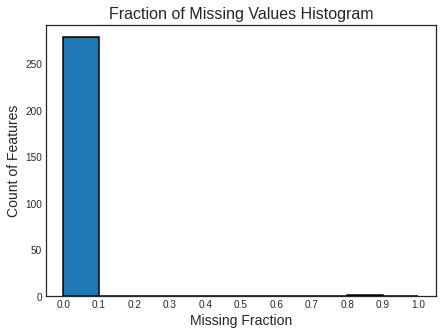

In [ ]:
ims.plot_missing()

# **Baseline Model**

In [ ]:
dt_baseline = DummyTransformer()

In [ ]:
X_data_train_2_baseline = dt_baseline.fit_transform(X_data_train_2)
X_data_test_2_baseline = dt_baseline.transform(X_data_test_2)

In [ ]:
scaler_baseline = StandardScaler()
clf_baseline = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)

In [ ]:
clf_baseline.fit(scaler_baseline.fit_transform(X_data_train_2_baseline), Y_data_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('AUC Train', roc_auc_score(Y_data_train, clf_baseline.predict_proba(scaler_baseline.transform(X_data_train_2_baseline))[:,1]))
print('AUC Test', roc_auc_score(Y_data_test, clf_baseline.predict_proba(scaler_baseline.transform(X_data_test_2_baseline))[:,1]))

AUC Train 0.8990598931897427
AUC Test 0.8098995695839311


In [ ]:
results = []

In [ ]:
results.append(['Baseline',
      roc_auc_score(Y_data_train, clf_baseline.predict_proba(scaler_baseline.transform(X_data_train_2_baseline))[:,1]),
      roc_auc_score(Y_data_test, clf_baseline.predict_proba(scaler_baseline.transform(X_data_test_2_baseline))[:,1])
])

# **Feature Selection**

## **Regularization**

In [ ]:
rvs = RegularizationFeatureSelection(n_folds=1, RegularizationStrength=0.1)

In [ ]:
X_data_train_3 = rvs.fit_transform(X_data_train_2, Y_data_train)

Training Lasso Regression Model



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_data_test_3 = rvs.transform(X_data_test_2)

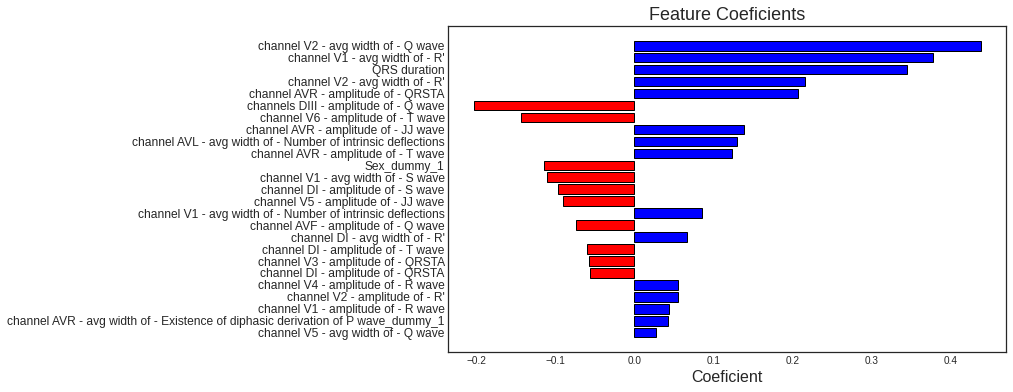

In [ ]:
rvs.plot_feature_coefs(plot_n=25)

In [ ]:
X_data_train_3.shape

(302, 33)

In [ ]:
pd.set_option('display.max_rows', None)
rvs.dfAbsoluteCoefs

,feature,coef,absolute_coef
7,channel V2 - avg width of - Q wave,0.44,0.44
5,channel V1 - avg width of - R',0.38,0.38
0,QRS duration,0.35,0.35
8,channel V2 - avg width of - R',0.22,0.22
19,channel AVR - amplitude of - QRSTA,0.21,0.21
16,channels DIII - amplitude of - Q wave,-0.20,0.20
28,channel V6 - amplitude of - T wave,-0.14,0.14
17,channel AVR - amplitude of - JJ wave,0.14,0.14
3,channel AVL - avg width of - Number of intrins...,0.13,0.13
18,channel AVR - amplitude of - T wave,0.12,0.12


In [ ]:
pd.reset_option('display.max_rows')

## **Variable Clustering**

In [ ]:
vcs = VariableClusteringSelection(dissimilarity_threshold=0.9)

In [ ]:
X_data_train_4 = vcs.fit_transform(X_data_train_3)

Fitting Agglomerative Clustering



/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [ ]:
X_data_test_4 = vcs.transform(X_data_test_3)

In [ ]:
X_data_train_4.shape

(302, 24)

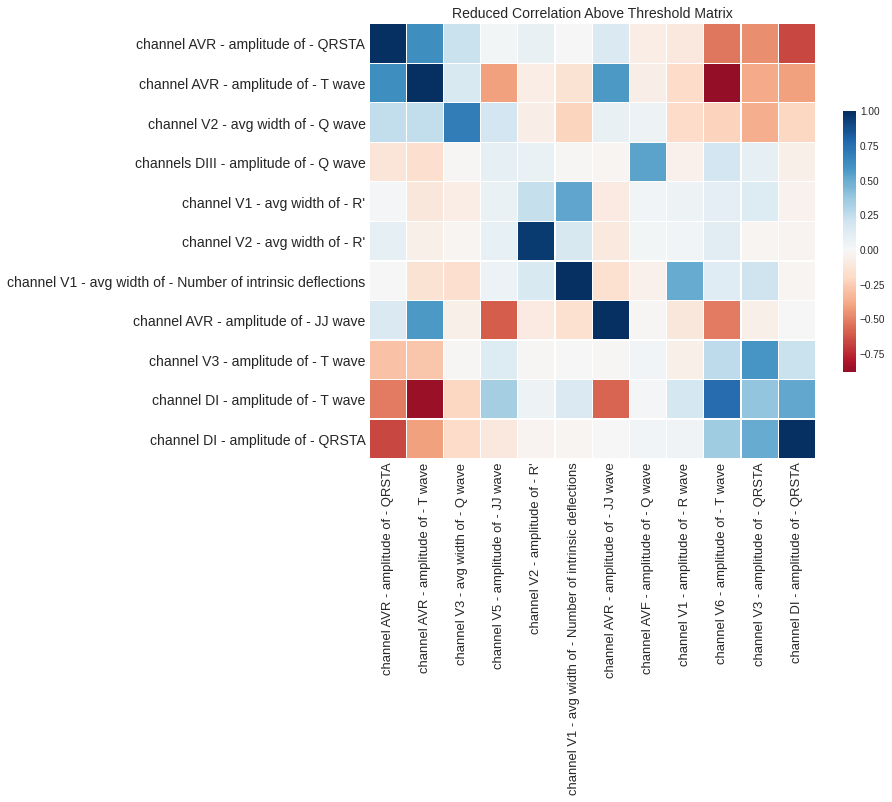

In [ ]:
vcs.plot_collinear(correlation_threshold=0.5, cmap='RdBu')

In [ ]:
vcs.df_best_variables

,cluster,variable,own_cluster_Rˆ2,neighbor_cluster_Rˆ2,1-Rˆ2 Ratio
3,18.00,QRS duration,1.00,0.12,0.00
4,17.00,channel DI - avg width of - R',1.00,0.02,0.00
5,16.00,channel DI - amplitude of - S wave,1.00,0.01,0.00
6,15.00,channel V4 - amplitude of - R wave,1.00,0.04,0.00
7,14.00,channel V1 - avg width of - S wave,1.00,0.01,0.00
8,4.00,channel V3 - amplitude of - T wave,1.00,0.08,0.00
22,19.00,channel V1 - amplitude of - R wave,1.00,0.04,0.00
19,12.00,channel V3 - amplitude of - QRSTA,1.00,0.16,0.00
18,11.00,channel V5 - avg width of - Q wave,1.00,0.04,0.00
17,10.00,channel AVL - avg width of - Number of intrins...,1.00,0.05,0.00


In [ ]:
vcs.df_variable_scores

,cluster,variable,own_cluster_Rˆ2,neighbor_cluster_Rˆ2,1-Rˆ2 Ratio
0,3.00,channel DI - amplitude of - T wave,0.75,0.03,0.26
1,3.00,channel AVR - amplitude of - T wave,0.86,0.03,0.14
2,3.00,channel V6 - amplitude of - T wave,0.78,0.02,0.23
3,18.00,QRS duration,1.00,0.12,0.00
4,17.00,channel DI - avg width of - R',1.00,0.02,0.00
5,16.00,channel DI - amplitude of - S wave,1.00,0.01,0.00
6,15.00,channel V4 - amplitude of - R wave,1.00,0.04,0.00
7,14.00,channel V1 - avg width of - S wave,1.00,0.01,0.00
8,4.00,channel V3 - amplitude of - T wave,1.00,0.08,0.00
9,5.00,channel DI - amplitude of - QRSTA,0.44,0.28,0.78


# **Model 1 - Selected Features**

In [ ]:
dt_treat1 = DummyTransformer()

In [ ]:
X_data_train_4_treat1 = dt_treat1.fit_transform(X_data_train_4)
X_data_test_4_treat1 = dt_treat1.transform(X_data_test_4)

In [ ]:
scaler_treat1 = StandardScaler()
clf_treat1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)

In [ ]:
clf_treat1.fit(scaler_treat1.fit_transform(X_data_train_4_treat1), Y_data_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('AUC Train', roc_auc_score(Y_data_train, clf_treat1.predict_proba(scaler_treat1.transform(X_data_train_4_treat1))[:,1]))
print('AUC Test', roc_auc_score(Y_data_test, clf_treat1.predict_proba(scaler_treat1.transform(X_data_test_4_treat1))[:,1]))

AUC Train 0.8756675641082228
AUC Test 0.8140243902439024


In [ ]:
results.append(['Model 1',
      roc_auc_score(Y_data_train, clf_treat1.predict_proba(scaler_treat1.transform(X_data_train_4_treat1))[:,1]),
      roc_auc_score(Y_data_test, clf_treat1.predict_proba(scaler_treat1.transform(X_data_test_4_treat1))[:,1])
])

# **Variable Discretization (treating non linearity)**

## **Optimal Interval Binning**

In [ ]:
oib = OptimalIntervalBinning(sigLevel=0.1, n_rank_groups=10)

In [ ]:
oib.fit(X_data_train_4, Y_data_train)

QRS duration
    countColumn  target - arrhythmia                       \
            sum                  sum                 mean   
bin                                                         
0            14                 4.00                 0.29   
1            29                12.00                 0.41   
2            39                11.00                 0.28   
3            25                12.00                 0.48   
4            22                 7.00                 0.32   
5            36                 8.00                 0.22   
6            37                16.00                 0.43   
7            25                14.00                 0.56   
8            31                20.00                 0.65   
9            28                21.00                 0.75   
10           16                14.00                 0.88   

            QRS duration                       
                    amin                 amax  
bin                                 

## **Interactive Binning**

In [ ]:
[f for f in oib.statistics]

['QRS duration',
 'channel AVF - amplitude of - Q wave',
 'channel AVL - avg width of - Number of intrinsic deflections',
 "channel AVL - avg width of - R'",
 'channel AVR - amplitude of - T wave',
 'channel DI - amplitude of - QRSTA',
 'channel DI - amplitude of - S wave',
 "channel DI - avg width of - R'",
 'channel DII - amplitude of - P wave',
 'channel V1 - amplitude of - R wave',
 "channel V1 - avg width of - R'",
 'channel V1 - avg width of - S wave',
 "channel V2 - avg width of - R'",
 'channel V3 - amplitude of - P wave',
 'channel V3 - amplitude of - QRSTA',
 'channel V3 - amplitude of - T wave',
 'channel V3 - avg width of - Q wave',
 'channel V4 - amplitude of - R wave',
 'channel V5 - amplitude of - JJ wave',
 'channel V5 - avg width of - Q wave']

### **QRS duration**

In [ ]:
feature = 'QRS duration'
oib.reset_feature(feature)

In [ ]:
oib.splitRange(feature=feature, split_range=0, split_value=90)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,90.00,178,61.00,0.34
1,1.00,90.00,99.00,76,40.00,0.53
2,2.00,99.00,inf,48,38.00,0.79


In [ ]:
oib.ignore_feature(feature)

### **channel AVF - amplitude of - Q wave**

In [ ]:
feature = 'channel AVF - amplitude of - Q wave'
oib.reset_feature(feature)

In [ ]:
oib.splitRange(feature=feature, split_range=0, split_value=0)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,0.00,70,38.00,0.54
1,1.00,0.00,inf,232,101.00,0.44


In [ ]:
oib.ignore_feature(feature)

### **channel AVL - avg width of - Number of intrinsic deflections**

In [ ]:
feature = 'channel AVL - avg width of - Number of intrinsic deflections'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,52.00,278,119.00,0.43
1,1.00,52.00,inf,24,20.00,0.83


In [ ]:
oib.splitRange(feature=feature, split_range=0, split_value=25)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,25.00,158,62.00,0.39
1,1.00,25.00,52.00,120,57.00,0.47
2,2.00,52.00,inf,24,20.00,0.83


In [ ]:
oib.ignore_feature(feature)

### **channel AVL - avg width of - R'**

In [ ]:
feature = 'channel AVL - avg width of - R\''
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,inf,302,139.00,0.46


In [ ]:
oib.splitRange(feature=feature, split_range=0, split_value=1)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,1.00,295,137.00,0.46
1,1.00,1.00,inf,7,2.00,0.29


In [ ]:
oib.ignore_feature(feature)

### **channel AVR - amplitude of - T wave**

In [ ]:
feature = 'channel AVR - amplitude of - T wave'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,-1.10,158,50.00,0.32
1,1.00,-1.10,-0.90,28,17.00,0.61
2,2.00,-0.90,-0.70,24,7.00,0.29
3,3.00,-0.70,0.90,75,48.00,0.64
4,4.00,0.90,inf,17,17.00,1.00


In [ ]:
oib.mergeRange(feature=feature, new_start_range=1, new_end_range=2)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,-1.10,158,50.00,0.32
1,1.00,-1.10,-0.70,52,24.00,0.46
2,2.00,-0.70,0.90,75,48.00,0.64
3,3.00,0.90,inf,17,17.00,1.00


In [ ]:
oib.ignore_feature(feature)

### **channel DI - amplitude of - QRSTA**

In [ ]:
feature = 'channel DI - amplitude of - QRSTA'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,12.30,73,51.00,0.70
1,1.00,12.30,42.80,212,85.00,0.40
2,2.00,42.80,inf,17,3.00,0.18


In [ ]:
oib.ignore_feature(feature)

### **channel DI - amplitude of - S wave**

In [ ]:
feature = 'channel DI - amplitude of - S wave'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,-0.90,126,68.00,0.54
1,1.00,-0.90,-0.50,36,10.00,0.28
2,2.00,-0.50,inf,140,61.00,0.44


### **channel DI - avg width of - R'**

In [ ]:
feature = 'channel DI - avg width of - R\''
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,inf,302,139.00,0.46


In [ ]:
oib.splitRange(feature=feature, split_range=0, split_value=1)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,1.00,299,136.00,0.45
1,1.00,1.00,inf,3,3.00,1.00


In [ ]:
oib.ignore_feature(feature)

### **channel DII - amplitude of - P wave**

In [ ]:
feature = 'channel DII - amplitude of - P wave'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,1.50,250,113.00,0.45
1,1.00,1.50,inf,52,26.00,0.50


In [ ]:
oib.splitRange(feature=feature, split_range=0, split_value=1)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,1.00,130,65.00,0.50
1,1.00,1.00,1.50,120,48.00,0.40
2,2.00,1.50,inf,52,26.00,0.50


In [ ]:
oib.splitRange(feature=feature, split_range=0, split_value=0.5)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,0.50,34,26.00,0.76
1,1.00,0.50,1.00,96,39.00,0.41
2,2.00,1.00,1.50,120,48.00,0.40
3,3.00,1.50,inf,52,26.00,0.50


In [ ]:
oib.mergeRange(feature=feature, new_start_range=1, new_end_range=2)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,0.50,34,26.00,0.76
1,1.00,0.50,1.50,216,87.00,0.40
2,2.00,1.50,inf,52,26.00,0.50


### **channel V1 - amplitude of - R wave**

In [ ]:
feature = 'channel V1 - amplitude of - R wave'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,4.10,285,126.00,0.44
1,1.00,4.10,inf,17,13.00,0.76


In [ ]:
oib.splitRange(feature=feature, split_range=0, split_value=1)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,1.00,131,67.00,0.51
1,1.00,1.00,4.10,154,59.00,0.38
2,2.00,4.10,inf,17,13.00,0.76


### **channel V1 - avg width of - R'**

In [ ]:
feature = 'channel V1 - avg width of - R\''
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,inf,302,139.00,0.46


In [ ]:
oib.splitRange(feature=feature, split_range=0, split_value=1)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,1.00,272,115.00,0.42
1,1.00,1.00,inf,30,24.00,0.80


In [ ]:
oib.ignore_feature(feature)

### **channel V1 - avg width of - S wave**

In [ ]:
feature = 'channel V1 - avg width of - S wave'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,52.00,151,85.00,0.56
1,1.00,52.00,68.00,127,43.00,0.34
2,2.00,68.00,inf,24,11.00,0.46


### **channel V2 - avg width of - R'**

In [ ]:
feature = 'channel V2 - avg width of - R\''
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,inf,302,139.00,0.46


In [ ]:
oib.splitRange(feature=feature, split_range=0, split_value=1)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,1.00,282,123.00,0.44
1,1.00,1.00,inf,20,16.00,0.80


In [ ]:
oib.ignore_feature(feature)

### **channel V3 - amplitude of - P wave**

In [ ]:
feature = 'channel V3 - amplitude of - P wave'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,0.40,158,63.00,0.40
1,1.00,0.40,0.70,82,38.00,0.46
2,2.00,0.70,inf,62,38.00,0.61


In [ ]:
oib.ignore_feature(feature)

### **channel V3 - amplitude of - QRSTA**

In [ ]:
feature = 'channel V3 - amplitude of - QRSTA'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,8.90,72,51.00,0.71
1,1.00,8.90,45.30,123,50.00,0.41
2,2.00,45.30,67.30,60,18.00,0.30
3,3.00,67.30,inf,47,20.00,0.43


In [ ]:
oib.mergeRange(feature=feature, new_start_range=2, new_end_range=3)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,8.90,72,51.00,0.71
1,1.00,8.90,45.30,123,50.00,0.41
2,2.00,45.30,inf,107,38.00,0.36


In [ ]:
oib.ignore_feature(feature)

### **channel V3 - amplitude of - T wave**

In [ ]:
feature = 'channel V3 - amplitude of - T wave'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,3.40,131,76.00,0.58
1,1.00,3.40,8.80,154,53.00,0.34
2,2.00,8.80,inf,17,10.00,0.59


### **channel V3 - avg width of - Q wave**

In [ ]:
feature = 'channel V3 - avg width of - Q wave'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,inf,302,139.00,0.46


In [ ]:
oib.splitRange(feature=feature, split_range=0, split_value=1)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,1.00,280,120.00,0.43
1,1.00,1.00,inf,22,19.00,0.86


In [ ]:
oib.ignore_feature(feature)

### **channel V4 - amplitude of - R wave**

In [ ]:
feature = 'channel V4 - amplitude of - R wave'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,9.00,103,46.00,0.45
1,1.00,9.00,11.80,59,31.00,0.53
2,2.00,11.80,13.40,30,7.00,0.23
3,3.00,13.40,15.40,32,17.00,0.53
4,4.00,15.40,18.50,31,9.00,0.29
5,5.00,18.50,inf,47,29.00,0.62


In [ ]:
oib.mergeRange(feature=feature, new_start_range=0, new_end_range=1)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,11.80,162,77.00,0.48
1,1.00,11.80,13.40,30,7.00,0.23
2,2.00,13.40,15.40,32,17.00,0.53
3,3.00,15.40,18.50,31,9.00,0.29
4,4.00,18.50,inf,47,29.00,0.62


In [ ]:
oib.mergeRange(feature=feature, new_start_range=1, new_end_range=3)
oib.statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,11.80,162,77.00,0.48
1,1.00,11.80,18.50,93,33.00,0.35
2,2.00,18.50,inf,47,29.00,0.62


### **channel V5 - amplitude of - JJ wave**

In [ ]:
feature = 'channel V5 - amplitude of - JJ wave'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,-0.60,61,43.00,0.70
1,1.00,-0.60,0.00,133,53.00,0.40
2,2.00,0.00,0.50,90,29.00,0.32
3,3.00,0.50,inf,18,14.00,0.78


### **channel V5 - avg width of - Q wave**

In [ ]:
feature = 'channel V5 - avg width of - Q wave'
oib.reset_feature(feature)
oib.original_statistics[feature]

,n_range,lower_bondary,upper_bondary,n_obs,n_events,event_rate
0,0.00,-inf,24.00,280,123.00,0.44
1,1.00,24.00,inf,22,16.00,0.73


In [ ]:
oib.ignore_feature(feature)

In [ ]:
X_data_train_5 = oib.transform(X_data_train_4)
X_data_test_5 = oib.transform(X_data_test_4)

# **Model 2 - Selected Features with some Discretized Features**

In [ ]:
dt_final = DummyTransformer()

In [ ]:
X_data_train_5_final = dt_final.fit_transform(X_data_train_5)
X_data_test_5_final = dt_final.transform(X_data_test_5)

In [ ]:
X_data_train_5_final

,QRS duration,channel AVF - amplitude of - Q wave,channel AVL - avg width of - Number of intrinsic deflections,channel AVL - avg width of - R',channel AVR - amplitude of - T wave,channel DI - amplitude of - QRSTA,channel DI - avg width of - R',channel V1 - avg width of - R',channel V2 - avg width of - R',channel V3 - amplitude of - P wave,channel V3 - amplitude of - QRSTA,channel V3 - avg width of - Q wave,channel V5 - avg width of - Q wave,Sex_dummy_1,channel AVR - avg width of - Existence of diphasic derivation of P wave_dummy_1,channel DI - avg width of - Existence of diphasic derivation of P wave_dummy_1,channel V3 - avg width of - Existence of diphasic derivation of P wave_dummy_1,ibin_channel DI - amplitude of - S wave_dummy_0,ibin_channel DI - amplitude of - S wave_dummy_2,ibin_channel DII - amplitude of - P wave_dummy_0,ibin_channel DII - amplitude of - P wave_dummy_2,ibin_channel V1 - amplitude of - R wave_dummy_0,ibin_channel V1 - amplitude of - R wave_dummy_2,ibin_channel V1 - avg width of - S wave_dummy_0,ibin_channel V1 - avg width of - S wave_dummy_2,ibin_channel V3 - amplitude of - T wave_dummy_0,ibin_channel V3 - amplitude of - T wave_dummy_2,ibin_channel V4 - amplitude of - R wave_dummy_0,ibin_channel V4 - amplitude of - R wave_dummy_2,ibin_channel V5 - amplitude of - JJ wave_dummy_0,ibin_channel V5 - amplitude of - JJ wave_dummy_2,ibin_channel V5 - amplitude of - JJ wave_dummy_3
0,79.00,-0.60,20.00,0.00,-2.30,29.30,0.00,0.00,0.00,1.30,56.10,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,91.00,0.00,44.00,0.00,-0.60,17.30,0.00,0.00,0.00,0.10,-26.80,80.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
2,105.00,-0.70,24.00,0.00,-1.10,3.00,0.00,0.00,32.00,0.20,-15.90,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
3,96.00,-0.40,20.00,0.00,-2.40,25.70,0.00,0.00,0.00,0.40,25.00,0.00,16.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
4,79.00,0.00,36.00,0.00,0.60,1.70,0.00,0.00,0.00,0.20,8.90,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,85.00,0.00,24.00,0.00,-1.50,8.00,0.00,0.00,0.00,0.60,11.30,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
298,102.00,-0.40,16.00,0.00,-1.40,24.90,0.00,44.00,44.00,0.80,32.80,0.00,20.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
299,94.00,-0.40,12.00,0.00,-1.70,10.70,0.00,32.00,0.00,1.40,59.90,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
300,80.00,0.00,48.00,0.00,-0.90,18.30,0.00,0.00,0.00,0.30,9.30,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00


In [ ]:
scaler_final = StandardScaler()
clf_final = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)

In [ ]:
clf_final.fit(scaler_final.fit_transform(X_data_train_5_final), Y_data_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('AUC Train', roc_auc_score(Y_data_train, clf_final.predict_proba(scaler_final.transform(X_data_train_5_final))[:,1]))
print('AUC Test', roc_auc_score(Y_data_test, clf_final.predict_proba(scaler_final.transform(X_data_test_5_final))[:,1]))

AUC Train 0.8957496579423578
AUC Test 0.8391319942611191


In [ ]:
results.append(['Model 2',
      roc_auc_score(Y_data_train, clf_final.predict_proba(scaler_final.transform(X_data_train_5_final))[:,1]),
      roc_auc_score(Y_data_test, clf_final.predict_proba(scaler_final.transform(X_data_test_5_final))[:,1])
])

# **Final Comparision**

In [ ]:
pd.options.display.float_format = "{:,.4f}".format
pd.DataFrame(results, columns=['Model', 'AUC Train', 'AUC Test'])

,Model,AUC Train,AUC Test
0,Baseline,0.8991,0.8099
1,Model 1,0.8757,0.8140
2,Model 2,0.8957,0.8391
